# Spatial Analysis

Using examples from 
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
- http://darribas.org/gds15/content/labs/lab_06.html

Add population density
Add furlough and co-location? Remove areas where low desnity
https://mgimond.github.io/Spatial/uncertainty-in-census-data.html

Just map a covid - but don't show areas with such low population density

Spatial correlation of COVID mortality?
Spatial correlation of Furlought (spatial?)
Spatial correlation of higher ethnicicities ?
Spatial correlation of COVID cases ?

In [1]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [2]:
import sys
sys.path.insert(0, '../src/data')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bame_datastore

Found local clean copy of Local_Authority_Districts__December_2017__Boundaries_in_the_UK__WGS84_
Found local clean copy of fbook_covid_cases
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths
Found local clean copy of ethnicity_2011
Found local clean copy of furlough_data
Found local clean copy of key_workers
Found local clean copy of deprivation_data
Found local clean copy of population_est_data


In [124]:
master_df = pd.read_csv("../data/processed/dense_df.csv", index_col=0).drop(columns = "geometry")
master_df["pct_bame"] = master_df.Other+master_df.Black_African_Caribbean+master_df.Asian+master_df.Mixed


gdf1 = bame_datastore.lad_geog.gdf.set_index("lad17cd")
gdf = gdf1.join(master_df)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000024
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   objectid                 391 non-null    int64   
 1   lad17nm                  391 non-null    object  
 2   lad17nmw                 391 non-null    object  
 3   bng_e                    391 non-null    int64   
 4   bng_n                    391 non-null    int64   
 5   long                     391 non-null    float64 
 6   lat                      391 non-null    float64 
 7   st_areashape             391 non-null    float64 
 8   st_lengthshape           391 non-null    float64 
 9   geometry                 391 non-null    geometry
 10  Area Name                330 non-null    object  
 11  deaths_all               330 non-null    float64 
 12  deaths_covid             330 non-null    float64 
 13  total_pop                330 non-null    float64

In [125]:
# missing_rows= gdf[gdf.isna().any(axis=1)]
# missing_rows.sort_values(by = "area")

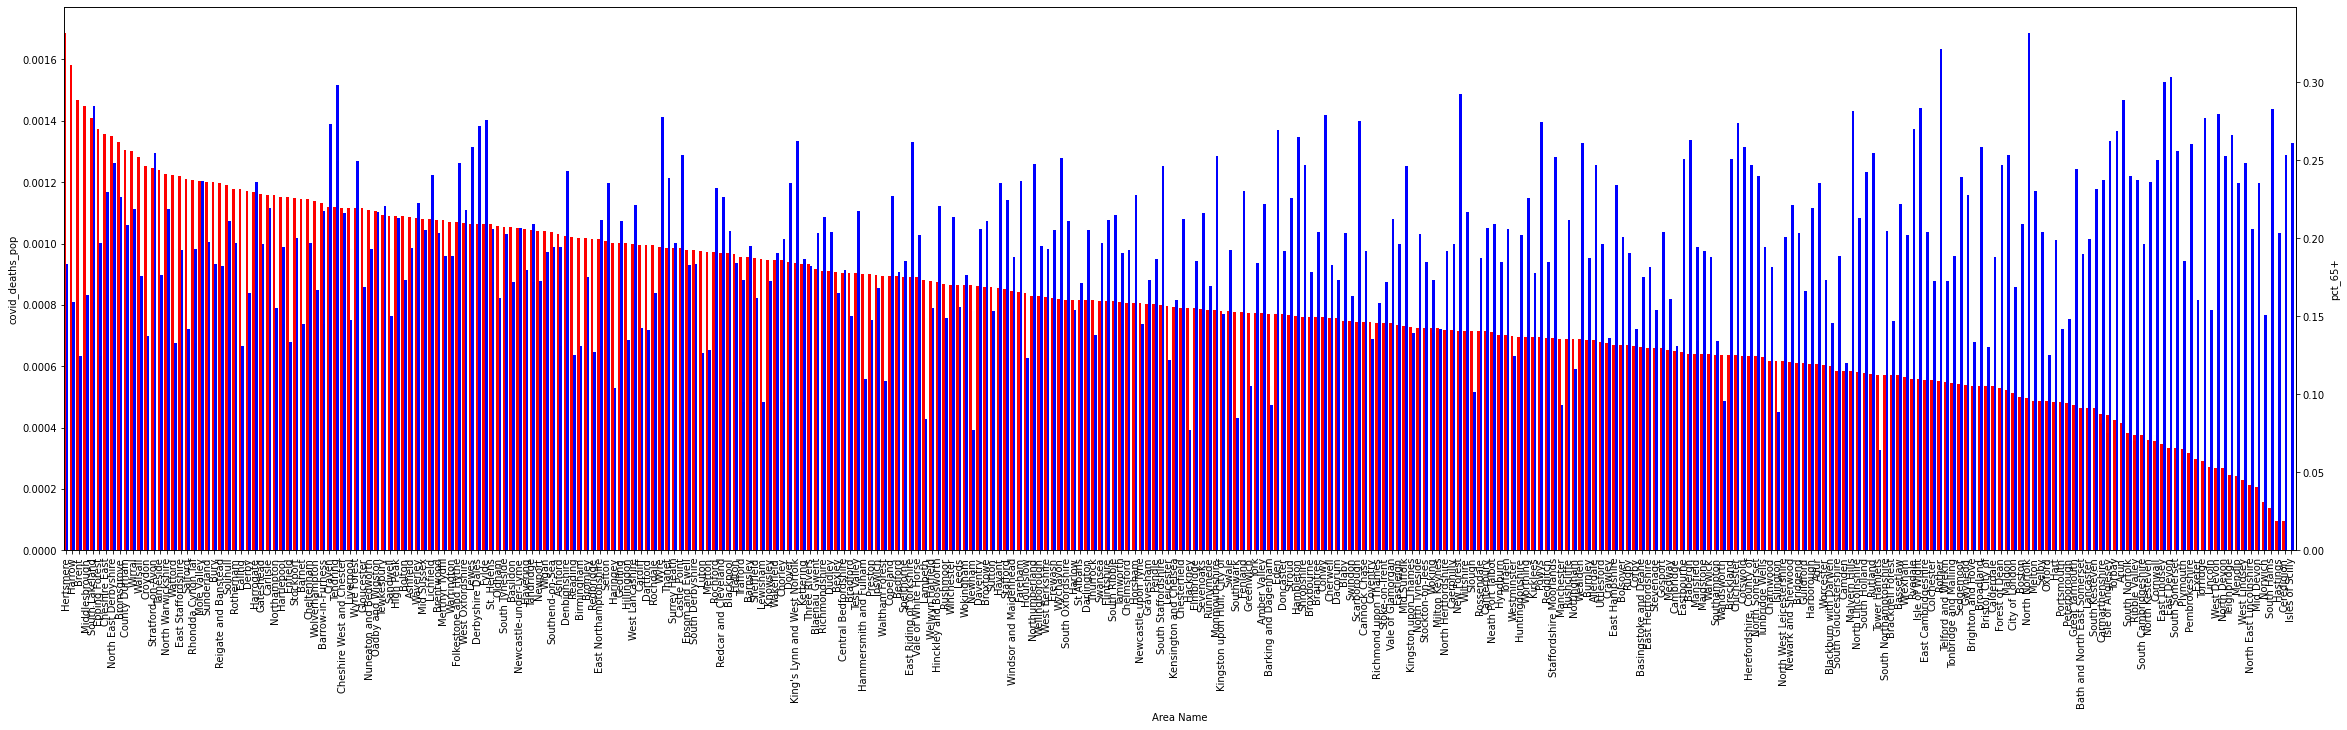

In [157]:
comp_var = "covid_deaths_pop"
comp_var2 = "pct_65+"


df = master_df.set_index("Area Name")[[comp_var, comp_var2]]
df = df.sort_values(by = comp_var, ascending=False)

fig = plt.figure(figsize=(40, 10)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df[comp_var].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df[comp_var2].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel(comp_var)
ax2.set_ylabel(comp_var2)

plt.show()

# Spatial Analysis

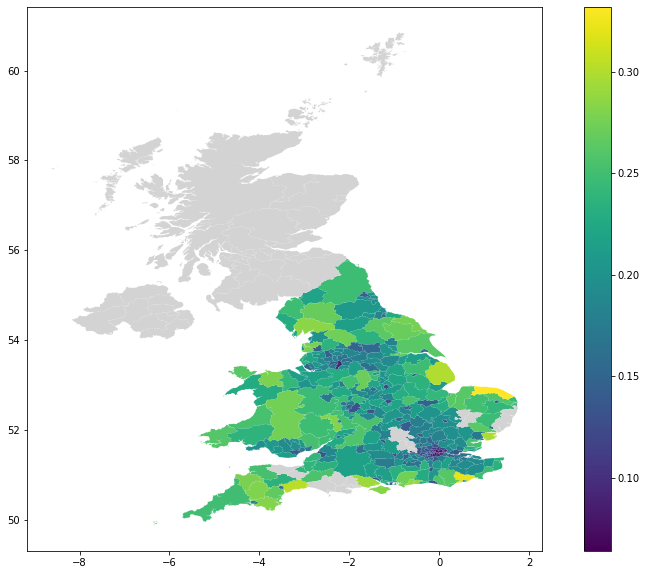

In [87]:
target_col = "pct_65+"
# gdf = gdf.dropna(subset=[target_col])
gdf.plot(column=target_col, cmap='viridis', legend=True, figsize=(15, 10),
         missing_kwds = dict(color = "lightgrey"))

In [88]:
gdf = gdf.dropna(subset=[target_col])
y = gdf[target_col].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 308, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 43, 49, 308.
  warnings.warn(message)


In [89]:
# spatial Autocorrelation

from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 308, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 43, 49, 308.
  warnings.warn(message)


0.46199072892078985

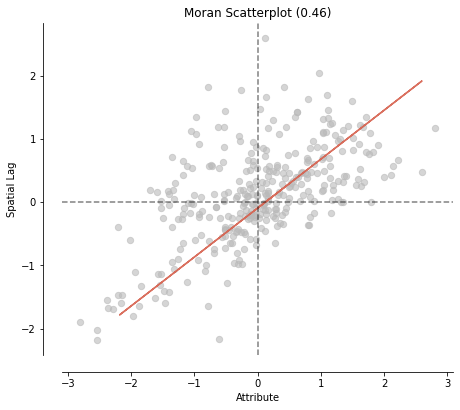

In [90]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

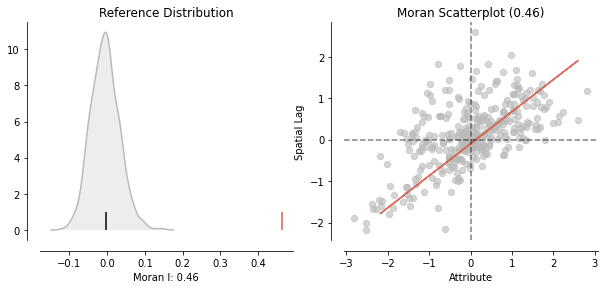

In [91]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [92]:
moran.p_sim



0.001

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/esda/moran.py:886: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


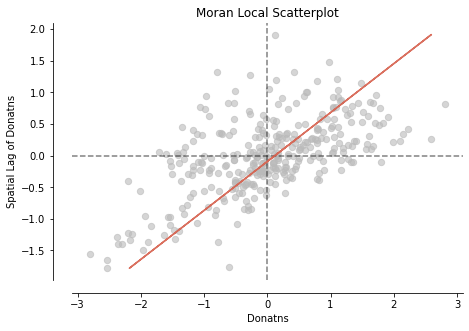

In [93]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()


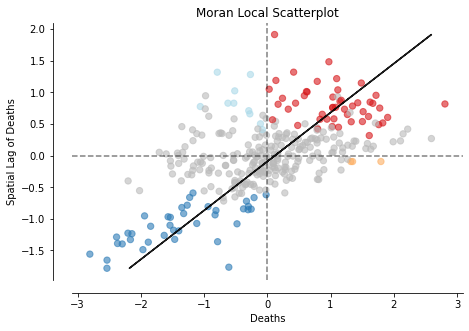

In [94]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Deaths')
ax.set_ylabel('Spatial Lag of Deaths')
plt.show()

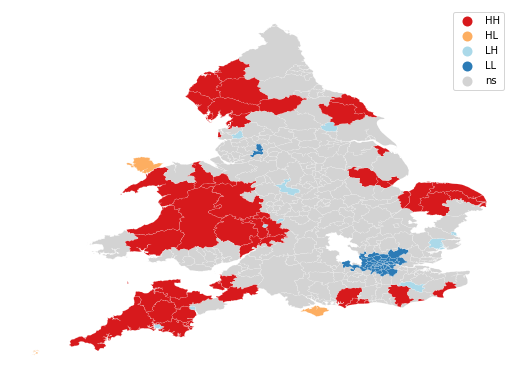

In [95]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.savefig(f"../reports/figures/spatial_cor_{target_col}.png")
plt.show()
